In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
! wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv

--2021-03-09 08:51:45--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61896 (60K) [text/plain]
Saving to: ‘sbux.csv’

sbux.csv            100%[===================>]  60.45K  --.-KB/s    in 0.007s  

2021-03-09 08:51:45 (8.97 MB/s) - ‘sbux.csv’ saved [61896/61896]



In [ ]:
xx=files.upload()

In [4]:
ls

sample_data/  sbux.csv


In [5]:
df=pd.read_csv('sbux.csv')

In [6]:
df.drop(columns='Name')

,date,open,high,low,close,volume
0,2013-02-08,27.920,28.325,27.920,28.185,7146296
1,2013-02-11,28.260,28.260,27.930,28.070,5457354
2,2013-02-12,28.000,28.275,27.975,28.130,8665592
3,2013-02-13,28.230,28.230,27.750,27.915,7022056
4,2013-02-14,27.765,27.905,27.675,27.775,8899188
...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065


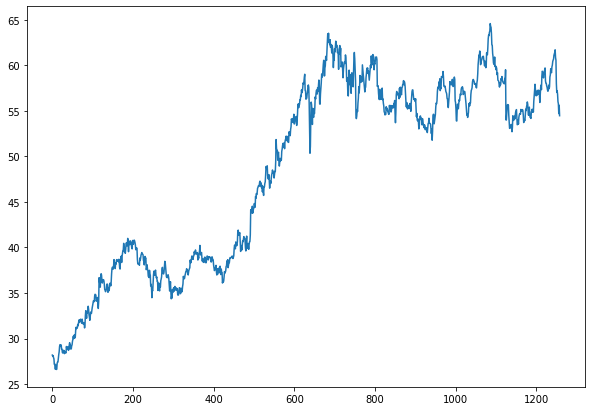

In [7]:
plt.figure(figsize=(10,7))
plt.plot(df["close"]);

In [ ]:
df['Pre_close']=df['close'].shift(1)

In [ ]:
df['Return']=(df['close']-df['Pre_close'])/df['Pre_close']

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,Pre_close,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


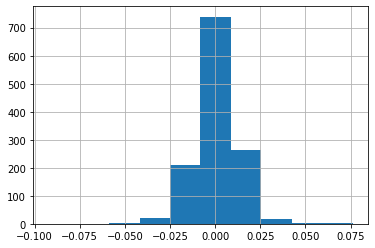

In [ ]:
df['Return'].hist()

In [ ]:
input_set=df[['open','high','low','volume','close']].values
y=df['Return'].values

In [ ]:
input_set.shape
print(len(input_set))

1259


In [ ]:
T=10
D=input_set.shape[1]
N=len(input_set)-T

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
Trainset=len(input_set)* 2//3
scaler.fit(input_set[:Trainset+T])
input_set=scaler.transform(input_set)

In [ ]:
x_train=np.zeros((Trainset, T, D))
y_train=np.zeros(Trainset)
print(x_train.shape)
for t in range(Trainset):
    x_train[t, :, :]=input_set[t:t+T]
    y_train[t]= (y[t+T]>0)

print(y_train.shape)   
  

(839, 10, 5)
(839,)


In [ ]:
x_test=np.zeros((N-Trainset,T,D))
y_test=np.zeros((N-Trainset)) 
for u in range(N-Trainset):
    t=u+Trainset
    x_test[u, :, :]=input_set[t:t+T]
    y_test[u]= (y[t+T]>0)

In [ ]:
i=Input(shape=(T, D))
x=LSTM(50)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i, x)
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=300,batch_size=32,)

Epoch 1/300
27/27 [==============================] - 3s 32ms/step - loss: 0.7004 - accuracy: 0.4788 - val_loss: 0.6917 - val_accuracy: 0.5561
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.5382 - val_loss: 0.6940 - val_accuracy: 0.4878
Epoch 3/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5272 - val_loss: 0.6950 - val_accuracy: 0.4878
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5440 - val_loss: 0.6929 - val_accuracy: 0.5073
Epoch 5/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5369 - val_loss: 0.6914 - val_accuracy: 0.5390
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5529 - val_loss: 0.6987 - val_accuracy: 0.4878
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.5362 - val_loss: 0.6939 - val_accuracy: 0.5049
Epoch 8/300


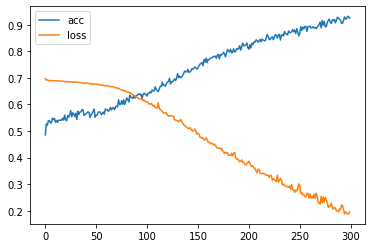

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['loss'],label='loss')
plt.legend();